In [1]:
    # This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import cv2
from cv2 import imread


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#os.environ['CUDA_VISIBLE_DEVICE']='-1'
# for dirname, _, filenames in os.walk('/kaggle/input/'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))
        
training_dataset = '/kaggle/input/writer-handwriting-detection/dataset/dataset/train'

# for dirname,_,filenames in os.walk(training_dataset):
#     for filename in filenames:
#         print(os.path.join(dirname,filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# specify te shape of the inputs for our network
IMG_SHAPE = (224, 224, 1)
# specify the batch size and number of epochs
BATCH_SIZE = 64
EPOCHS = 100
evaluate = True

# Reading validation dataset from val.csv
using pandas 

In [3]:
val_Data = '/kaggle/input/writer-handwriting-detection/dataset/dataset/val.csv'
val_Data = pd.read_csv(val_Data)
val_Data

,img1_name,img2_name,label
0,70a4ba9a.jpg,58f68a00.jpg,1
1,e15b612e.jpg,16ce5df2.jpg,0
2,6c64d988.jpg,735d3636.jpg,1
3,b74681a6.jpg,cb50496d.jpg,0
4,c97aa428.jpg,6f9dc747.jpg,1
...,...,...,...
5765,4e7762f7.jpg,2f3d2bce.jpg,0
5766,c1c49f87.jpg,1072597f.jpg,0
5767,03e66099.jpg,f877b1b6.jpg,1
5768,8e056e51.jpg,f68e79a1.jpg,1


In [4]:
# import the necessary packages
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Rescaling
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,MaxPool2D 
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Lambda
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras
import tensorflow.keras.backend as K

D0714 07:24:20.201023784      15 config.cc:119]                        gRPC EXPERIMENT tcp_frame_size_tuning               OFF (default:OFF)
D0714 07:24:20.201079373      15 config.cc:119]                        gRPC EXPERIMENT tcp_rcv_lowat                       OFF (default:OFF)
D0714 07:24:20.201087389      15 config.cc:119]                        gRPC EXPERIMENT peer_state_based_framing            OFF (default:OFF)
D0714 07:24:20.201091966      15 config.cc:119]                        gRPC EXPERIMENT flow_control_fixes                  ON  (default:ON)
D0714 07:24:20.201095650      15 config.cc:119]                        gRPC EXPERIMENT memory_pressure_controller          OFF (default:OFF)
D0714 07:24:20.201098948      15 config.cc:119]                        gRPC EXPERIMENT unconstrained_max_quota_buffer_size OFF (default:OFF)
D0714 07:24:20.201101981      15 config.cc:119]                        gRPC EXPERIMENT new_hpack_huffman_decoder           ON  (default:ON)
D0714 07:24:20.

In [5]:
# print("Tensorflow version " + tf.__version__)
# AUTO = tf.data.experimental.AUTOTUNE

# # Detect TPU, return appropriate distribution strategy
# try:
#     tpu = tf.distribute.cluster_resolver.TPUClusterResolver() 
#     print('Running on TPU ', tpu.master())
# except ValueError:
#     tpu = None

# if tpu:
#     tf.config.experimental_connect_to_cluster(tpu)
#     tf.distribute.TPUStrategy(tpu)
#     strategy = tf.distribute.experimental.TPUStrategy(tpu)
# else:
#     strategy = tf.distribute.get_strategy() 

# print("REPLICAS: ", strategy.num_replicas_in_sync)

In [5]:
PATH_TPU_WORKER = ''

def check_tpu():
    """
    Detect TPU hardware and return the appopriate distribution strategy
    """
    
    try:
        tpu = tf.distribute.cluster_resolver.TPUClusterResolver() 
        print('Running on TPU: {}'.format(tpu.master()))
    except ValueError:
        tpu = None

    if tpu:
        tf.config.experimental_connect_to_cluster(tpu)
        tf.tpu.experimental.initialize_tpu_system(tpu)
        tpu_strategy =tf.distribute.TPUStrategy(tpu)
    else:
        tpu_strategy = tf.distribute.get_strategy() # default distribution strategy in Tensorflow. Works on CPU and single GPU.

    print("Num. replicas: {}".format(tpu_strategy.num_replicas_in_sync))
    
    return tpu, tpu_strategy
    
tpu, tpu_strategy = check_tpu()
PATH_TPU_WORKER = tpu.master()
NUM_REPLICAS = tpu_strategy.num_replicas_in_sync

Running on TPU: 
INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.
INFO:tensorflow:Initializing the TPU system: local
INFO:tensorflow:Finished initializing TPU system.
INFO:tensorflow:Found TPU system:
INFO:tensorflow:*** Num TPU Cores: 8
INFO:tensorflow:*** Num TPU Workers: 1
INFO:tensorflow:*** Num TPU Cores Per Worker: 8
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:0, TPU, 0, 0)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:1, TPU, 0, 0)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:2, TPU, 0, 0)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:3, TPU, 0, 0)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/

In [7]:
# from kaggle_datasets import KaggleDatasets
# GCS_DS_PATH = KaggleDatasets().get_gcs_path("/kaggle/input/writer-handwriting-detection")

In [6]:
def euclidean_distance(vectors):
    # unpack the vectors into separate lists
    (featsA, featsB) = vectors
    # compute the sum of squared distances between the vectors
    sumSquared = K.sum(K.square(featsA - featsB), axis=1,
        keepdims=True)
    # return the euclidean distance between the vectors
    return K.sqrt(K.maximum(sumSquared, K.epsilon()))

In [6]:
def sort_contours(cnts, method="left-to-right"):
	# initialize the reverse flag and sort index
	reverse = False
	i = 0
	# handle if we need to sort in reverse
	if method == "right-to-left" or method == "bottom-to-top":
		reverse = True
	# handle if we are sorting against the y-coordinate rather than
	# the x-coordinate of the bounding box
	if method == "top-to-bottom" or method == "bottom-to-top":
		i = 1
	# construct the list of bounding boxes and sort them from top to
	# bottom
	boundingBoxes = [cv2.boundingRect(c) for c in cnts]
	(cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
		key=lambda b:b[1][i], reverse=reverse))
	# return the list of sorted contours and bounding boxes
	return (cnts, boundingBoxes)

In [7]:
def cut(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    thresh, img_bin = cv2.threshold(img, 128, 255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# Invert the image
    img_bin = 255-img_bin 

    # Defining a kernel length
    kernel_length = np.array(img).shape[1]//80
    
    # A verticle kernel of (1 X kernel_length), which will detect all the verticle lines from the image.
    verticle_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, kernel_length))
    # A horizontal kernel of (kernel_length X 1), which will help to detect all the horizontal line from the image.
    hori_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_length, 1))
    # A kernel of (3 X 3) ones.
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

    # Morphological operation to detect vertical lines from an image
    img_temp1 = cv2.erode(img_bin, verticle_kernel, iterations=3)
    verticle_lines_img = cv2.dilate(img_temp1, verticle_kernel, iterations=3)
    # Morphological operation to detect horizontal lines from an image
    img_temp2 = cv2.erode(img_bin, hori_kernel, iterations=3)
    horizontal_lines_img = cv2.dilate(img_temp2, hori_kernel, iterations=3)

    # Weighting parameters, this will decide the quantity of an image to be added to make a new image.
    alpha = 0.5
    beta = 1.0 - alpha
    # This function helps to add two image with specific weight parameter to get a third image as summation of two image.
    img_final_bin = cv2.addWeighted(verticle_lines_img, alpha, horizontal_lines_img, beta, 0.0)
    img_final_bin = cv2.erode(~img_final_bin, kernel, iterations=2)
    (thresh, img_final_bin) = cv2.threshold(img_final_bin, 128,255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    # Find contours for image, which will detect all the boxes
    contours, hierarchy = cv2.findContours(img_final_bin, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    # Sort all the contours by top to bottom.
    (contours, boundingBoxes) = sort_contours(contours, method="top-to-bottom")
    return contours, boundingBoxes

In [8]:

def checkval(img):
    result = img.copy()
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
    horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (20,2))
    remove_horizontal = cv2.morphologyEx(thresh , cv2.RETR_EXTERNAL,horizontal_kernel, iterations =2)
    cnts = cv2.findContours(remove_horizontal,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if  len(cnts) == 2 else cnts[1]
    for c in cnts:
        cv2.drawContours(result,[c],-1,(255,255,255),5)

    horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,20))
    remove_horizontal = cv2.morphologyEx(thresh , cv2.RETR_EXTERNAL,horizontal_kernel, iterations =2)
    cnts = cv2.findContours(remove_horizontal,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if  len(cnts) == 2 else cnts[1]
    for c in cnts:
        cv2.drawContours(result,[c],-1,(255,255,255),5)
   

    hsv1 = cv2.cvtColor(result,cv2.COLOR_BGR2HSV)
    lower_black = np.array([0,0,0])
    upper_black = np.array([130,130,130])
    mask = cv2.inRange(hsv1,lower_black,upper_black)
    resultf = cv2.bitwise_and(img,img,mask=mask)
    re = np.count_nonzero(mask)
    return re,img

In [12]:
# def fragment_generator(path1,path2):
#     img1 = []
#     img = imread(path1)
#     x,y,_=img.shape
#     img= cv2.resize(img,(int((y/x)*224),224),fx=0.3,fy=0.3,interpolation = cv2.INTER_LINEAR)
#     for m in range(0,int(y/x)):
#         count , image = checkval(img[:,m*224:(m+1)*224,:])
#         if (1100 < count < 10000 ):
#             gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
#             img1.append(np.array(gray))
            
#     img2 = []
#     img = imread(path2)
#     x,y,_=img.shape
#     img= cv2.resize(img,(int((y/x)*224),224),fx=0.3,fy=0.3,interpolation = cv2.INTER_LINEAR)
#     for m in range(0,int(y/x)):
#         count , image = checkval(img[:,m*224:(m+1)*224,:])
#         if (1100 < count < 10000 ):
#             gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
#             img2.append(np.array(gray))  
#     imges = []
#     for i in img1:
#         for j in img2:
#             imges.append([i,j])
#     return np.array(imges)
    

In [9]:
with tpu_strategy.scope():
    model2 = keras.models.load_model("/kaggle/input/vgg16-model/vgg16_nn_data.h5")
model2.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_17 (InputLayer)          [(None, 224, 224, 1  0           []                               
                                )]                                                                
                                                                                                  
 input_18 (InputLayer)          [(None, 224, 224, 1  0           []                               
                                )]                                                                
                                                                                                  
 sequential_3 (Sequential)      (None, 1024)         40404672    ['input_17[0][0]',               
                                                                  'input_18[0][0]']         

In [10]:
def fragment_generator(path1,path2):
    img1 = []
    img = imread(path1)
    x,y,_=img.shape
    img= cv2.resize(img,(int((y/x)*224),224),fx=0.3,fy=0.3,interpolation = cv2.INTER_LINEAR)         
    contours, boundingBoxes = cut(img)
    for c in contours:
        # Returns the location and width,height for every contour
        x, y, w, h = cv2.boundingRect(c)
        if (w > 200 and h > 100) and w > 3*h:

            new_img = img[y:y+h, x:x+w]
            xl,yl,_=new_img.shape
            imgcut= cv2.resize(new_img,(int((yl/xl)*224),224),fx=0.3,fy=0.3,interpolation = cv2.INTER_LINEAR)
            for m in range(0,int(yl/xl)):
                valtochek, imageto = checkval(imgcut[:,m*224:(m+1)*224,:])
                if (1100 < valtochek < 10000 ):
                    gray = cv2.cvtColor(imageto,cv2.COLOR_BGR2GRAY)
                    img1.append(np.array(gray))
            
    img2 = []
    img = imread(path2)
    x,y,_=img.shape
    img= cv2.resize(img,(int((y/x)*224),224),fx=0.3,fy=0.3,interpolation = cv2.INTER_LINEAR)

    contours, boundingBoxes = cut(img)
    for c in contours:
        # Returns the location and width,height for every contour
        x, y, w, h = cv2.boundingRect(c)
        if (w > 200 and h > 100) and w > 3*h:

            new_img = img[y:y+h, x:x+w]
            xl,yl,_=new_img.shape
            imgcut= cv2.resize(new_img,(int((yl/xl)*224),224),fx=0.3,fy=0.3,interpolation = cv2.INTER_LINEAR)
            for m in range(0,int(yl/xl)):
                valtochek, imageto = checkval(imgcut[:,m*224:(m+1)*224,:])
                if (1100 < valtochek < 10000 ):
                    gray = cv2.cvtColor(imageto,cv2.COLOR_BGR2GRAY)
                    img2.append(np.array(gray))  
    imges = []
    for i in img1:
        for j in img2:
            imges.append([i,j])
    return np.array(imges),imges

# Testing

In [11]:
def prediction2(model,data,path):
    proba = []
    y_preds = []
    ids = []
    notx = 0
    img1 = []
    index = []
    for i in range(data.shape[0]):
        path1 = path + data.iloc[i]["img1_name"]
        path2 = path + data.iloc[i]["img2_name"]
        ids.append(data.iloc[i]["img1_name"] + "_" + data.iloc[i]["img2_name"])
        image1 = cv2.imread(path1)
        image2 = cv2.imread(path2)
    #     plt.imshow(image1)
    #     plt.show()
    #     plt.imshow(image2)
    #     plt.show()
        generated_frag = fragment_generator(path1,path2)[1]
        img1 = img1 + generated_frag
        if len(index) == 0:
            index = index + [[0,len(img1)]]
        else:
            t = index[-1]
            index = index + [[t[-1],t[-1]+len(generated_frag)]]
        print(i)
    img1 = np.array(img1)

    y_pred =  model.predict([img1[:,0],img1[:,1]],batch_size = 1024)
#     print(y_pred.T)
    print(y_pred.shape)
    for i in index:
        if (i[0] == i[1]):
            y_preds.append(0)
            notx += 1
            proba.append(0)
        else:
            if(np.mean(y_pred[i[0]:i[1],0])>.5):
                y_preds.append(1)
            else:
                y_preds.append(0)
            proba.append(np.mean(y_pred[i[0]:i[1],0]))
        
        
                             
        
#         if img1.shape[0] == 0:
#             proba.append(0)
#             y_pred = [0,0]
#             notx += 1
#         else:
#             y_pred = model.predict([img1[:,0],img1[:,1]])
#             proba.append(np.mean(y_pred))

#         if(np.mean(y_pred) > .5):
#             y_preds.append(1)
#         else:
#             y_preds.append(0)

        print(i)
    return y_preds,proba,ids,notx

In [61]:
def prediction1(model,data,path):
    proba = []
    y_preds = []
    ids = []
    notx = 0
    for i in range(20,23):
        path1 = path + data.iloc[i]["img1_name"]
        path2 = path + data.iloc[i]["img2_name"]
        ids.append(data.iloc[i]["img1_name"] + "_" + data.iloc[i]["img2_name"])
        image1 = cv2.imread(path1)
        image2 = cv2.imread(path2)
    #     plt.imshow(image1)
    #     plt.show()
    #     plt.imshow(image2)
    #     plt.show()
        img1 = fragment_generator(path1,path2)[0]
        
        if img1.shape[0] == 0:
            proba.append(0)
            y_pred = [0,0]
            notx += 1
        else:
            y_pred = model.predict([img1[:,0],img1[:,1]])
            proba.append(np.mean(y_pred.T))

        if(np.mean(y_pred) > .5):
            y_preds.append(1)
        else:
            y_preds.append(0)
        print(proba)
        print(i)
    print(proba)
    return y_preds,proba,ids,notx

['dc814f2b.jpg_7e7459f4.jpg',
 '6256e7c9.jpg_42f87421.jpg',
 'badf0a7a.jpg_694f009b.jpg']

In [12]:
if evaluate == True:
    pathval =  "/kaggle/input/writer-handwriting-detection/dataset/dataset/val/"
    y_pred,proba,ids,notx = prediction2(model2,val_Data,pathval)
    data = {
        "id": ids,
        "proba" : proba
    }

    df = pd.DataFrame(data)

    df.to_csv("result2.csv",index=False)
    print(notx)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

2023-07-14 07:39:22.188141: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.
2023-07-14 07:39:22.302213: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.


474/474 [==============================] - 120s 233ms/step
(484512, 1)
[0, 420]
[420, 476]
[476, 503]
[503, 552]
[552, 968]
[968, 1068]
[1068, 1278]
[1278, 1383]
[1383, 1419]
[1419, 1437]
[1437, 1527]
[1527, 1632]
[1632, 1692]
[1692, 1716]
[1716, 1751]
[1751, 1766]
[1766, 1794]
[1794, 1860]
[1860, 2069]
[2069, 2264]
[2264, 2282]
[2282, 2282]
[2282, 2558]
[2558, 2608]
[2608, 2620]
[2620, 2644]
[2644, 2736]
[2736, 3231]
[3231, 3243]
[3243, 3249]
[3249, 3253]
[3253, 3309]
[3309, 3372]
[3372, 3390]
[3390, 3543]
[3543, 3693]
[3693, 3711]
[3711, 3735]
[3735, 3756]
[3756, 3826]
[3826, 3910]
[3910, 3917]
[3917, 3931]
[3931, 3977]
[3977, 4012]
[4012, 4077]
[4077, 4617]
[4617, 4622]
[4622, 4662]
[4662, 4806]
[4806, 5014]
[5014, 5062]
[5062, 5112]
[5112, 5140]
[5140, 5200]
[5200, 5232]
[5232, 5262]
[5262, 5352]
[5352, 5443]
[5443, 5583]
[5583, 5619]
[5619, 5652]
[5652, 5658]
[5658, 5714]
[5714, 5724]
[5724, 5772]
[5772, 5872]
[5872, 5884]
[5884, 5924]
[5924, 6029]
[6029, 6098]
[6098, 6398]
[6398,

In [15]:
if evaluate == True:
    print(notx)
    print(len(proba))
    z = list(val_Data['label'])
    y_pred = []
    for i in proba:
        if i > 0.5:
            y_pred.append(1)
        else:
            y_pred.append(0)
    print(len(y_pred))

171
5770
5770


In [16]:
import argparse
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score, roc_auc_score,accuracy_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
def plot_auc(y_true, y_proba):
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0, 1.05])
    plt.ylim([0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.savefig('roc_curve.png')


F1 score: 0.8384
AUC: 0.8773


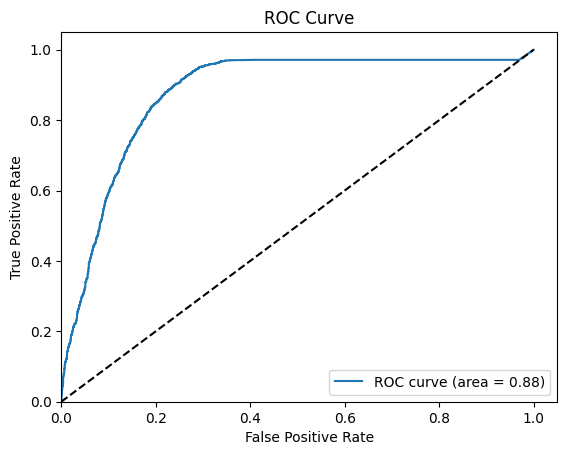

In [17]:
if evaluate == True:
    f1_score = f1_score(z, y_pred)
    auc = roc_auc_score(z, proba)
    plot_auc(z, proba)

    print('F1 score: {:.4f}'.format(f1_score))
    print('AUC: {:.4f}'.format(auc))

In [18]:
print(accuracy_score(z, y_pred))

0.8289428076256499


In [21]:
#val_Data["y_pred"] = y_preds
#val_Data["proba"] = proba

In [22]:
#val_Data.to_csv("results.csv")

# Dataloader

In [11]:
def make_pairs(images, labels):
    # initialize two empty lists to hold the (image, image) pairs and
    # labels to indicate if a pair is positive or negative
    pairImages = []
    pairLabels = []
    
    # calculate the total number of classes present in the dataset
    # and then build a list of indexes for each class label that
    # provides the indexes for all examples with a given label
    minClasses = min(labels)
    maxClasses = max(labels)
    idx = [np.where(labels == i)[0] for i in range(minClasses, maxClasses+1)]
    # loop over all images
    for idxA in range(len(images)):
        # grab the current image and label belonging to the current
        # iteration
        currentImage = images[idxA]
        label = labels[idxA]-minClasses
        # randomly pick an image that belongs to the *same* class
        # label
        idxB = np.random.choice(idx[label])
        posImage = images[idxB]
        # prepare a positive pair and update the images and labels
        # lists, respectively
        pairImages.append([currentImage, posImage])
        pairLabels.append([1])
        
        # grab the indices for each of the class labels *not* equal to
        # the current label and randomly pick an image corresponding
        # to a label *not* equal to the current label
        negIdx = np.where(labels != label)[0]
        negImage = images[np.random.choice(negIdx)]
        # prepare a negative pair of images and update our lists
        pairImages.append([currentImage, negImage])
        pairLabels.append([0])
    # return a 2-tuple of our image pairs and labels
    return (np.array(pairImages), np.array(pairLabels))
    
    

In [24]:
# all_writers =[]
# datasetx = []
# datasety = []
# dataset_aspect_ration =[]
# datax= []
# datay =[]
# datap = []
# img_data = []
# label = []
# path = '/kaggle/input/writer-handwriting-detection/dataset/dataset/train'
# for i,j in enumerate(os.listdir(path)):
#     all_writers.append(os.path.join(path,j))
    

# for i,j in enumerate(all_writers):
#     d =int(0)
#     if i> 300 and i <600:
#         for l,k in enumerate(os.listdir(j)):
#             image_path = os.path.join(j,k)
#             datasetx.append(image_path)
#             datasety.append(i)
#             img = imread(image_path)
#             x,y,_=img.shape
#             dataset_aspect_ration.append(y/x)
#             datax.append(x)
#             datay.append(y)
#             datap.append(x*y)
#             img= cv2.resize(img,(int((y/x)*224),224),fx=0.3,fy=0.3,interpolation = cv2.INTER_LINEAR)
#             for m in range(0,int(y/x)):
#                 valtochek, imageto = checkval(img[:,m*224:(m+1)*224,:])
#                 if (1100< valtochek < 10000 ):
#                     gray = cv2.cvtColor(imageto,cv2.COLOR_BGR2GRAY)
#                     img_data.append(gray)     
#                     label.append(i)
#                     d = d+1
#     print(i)
# data = {
#     "image_path": datasetx,
#     "label": datasety,
#     "aspectration": dataset_aspect_ration,
#     "x" :datax,
#     "y": datay,
#     "p" :datap
# }

# df = pd.DataFrame(data)

# df.to_csv("image_path.csv")


# img_data = np.array(img_data)
# label = np.array(label)





In [ ]:
if evaluate == False:
    all_writers =[]
    datasetx = []
    datasety = []
    dataset_aspect_ration =[]
    datax= []
    datay =[]
    datap = []
    img_data = []
    label = []
    path = '/kaggle/input/writer-handwriting-detection/dataset/dataset/train'
    for i,j in enumerate(os.listdir(path)):
        all_writers.append(os.path.join(path,j))


    for i,j in enumerate(all_writers):
        d =int(0)
        if i> 0 and i <1351:
            for l,k in enumerate(os.listdir(j)):
                image_path = os.path.join(j,k)
                datasetx.append(image_path)
                datasety.append(i)
                img = imread(image_path)
                x,y,_=img.shape
                dataset_aspect_ration.append(y/x)
                datax.append(x)
                datay.append(y)
                datap.append(x*y)
                contours, boundingBoxes = cut(img)
                for c in contours:
                    # Returns the location and width,height for every contour
                    x, y, w, h = cv2.boundingRect(c)
                    if (w > 200 and h > 100) and w > 3*h:

                        new_img = img[y:y+h, x:x+w]
                        xl,yl,_=new_img.shape
                        imgcut= cv2.resize(new_img,(int((yl/xl)*224),224),fx=0.3,fy=0.3,interpolation = cv2.INTER_LINEAR)
                        for m in range(0,int(yl/xl)):
                            valtochek, imageto = checkval(imgcut[:,m*224:(m*224+224),:])
                            if (1100 < valtochek < 10000 ):
                                gray = cv2.cvtColor(imageto,cv2.COLOR_BGR2GRAY)
                                img_data.append(gray)     
                                label.append(i)
                                d = d+1

        print(i)
    data = {
        "image_path": datasetx,
        "label": datasety,
        "aspectration": dataset_aspect_ration,
        "x" :datax,
        "y": datay,
        "p" :datap
    }

    df = pd.DataFrame(data)

    df.to_csv("image_path.csv")


    img_data = np.array(img_data)
    label = np.array(label)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [ ]:
print(label[10000])
print(len(img_data[0][2]),IMG_SHAPE)

In [12]:
if evaluate == False:
    from sklearn.model_selection import train_test_split

    (img_data, labelTrain) = make_pairs(img_data[:,:,:], label[:])

    img_data, pairTest,labelTrain,labelTest = train_test_split(img_data, labelTrain, test_size=0.2)

In [13]:
img_data.shape

(162718, 2, 224, 224)

# Siemens_network of py or Model1

In [25]:
def build_siamese_network(inputShape,embeddingDim=128):
    # Define the base network (shared weights)
    # specify the inputs for the feature extractor network
    inputs = Input(inputShape)
    #inputs = Rescaling(scale= 1./255 ,offset=0.0)(inputs)
    
    # define the first set of CONV => RELU => POOL => DROPOUT layers
    x = Conv2D(64, (3, 3), padding="same", activation="relu")(inputs)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Dropout(0.3)(x)
    # second set of CONV => RELU => POOL => DROPOUT layers
    x = Conv2D(64, (3, 3), padding="same", activation="relu")(x)
    x = MaxPooling2D(pool_size=2)(x)
    x = Dropout(0.3)(x)
    
#     x = Conv2D(64, (3, 3), padding="same", activation="relu")(x)
#     x = MaxPooling2D(pool_size=2)(x)
#     x = Dropout(0.3)(x)
    
#     x = Conv2D(64, (3, 3), padding="same", activation="relu")(x)
#     x = MaxPooling2D(pool_size=2)(x)
#     x = Dropout(0.3)(x)
    # prepare the final outputs
    pooledOutput = GlobalAveragePooling2D()(x)
    outputs = Dense(embeddingDim)(pooledOutput)
    # build the model
    model = Model(inputs, outputs)
    return model

In [37]:
def plot_training(H, plotPath="/kaggle/working/"):
    # construct a plot that plots and saves the training history
    plt.style.use("ggplot")
    plt.figure()
    plt.plot(H.history["loss"], label="train_loss")
    plt.plot(H.history["val_loss"], label="val_loss")
    plt.plot(H.history["accuracy"], label="train_acc")
    plt.plot(H.history["val_accuracy"], label="val_acc")
    plt.title("Training Loss and Accuracy")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss/Accuracy")
    plt.legend(loc="lower left")
    plt.savefig(plotPath)

In [15]:
def Vgg16(IMG_SHAPE,ration=0.2):
    model = Sequential()
    model.add(Conv2D(input_shape=IMG_SHAPE,filters=64,kernel_size=(3,3),padding="same", activation="relu"))
    model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(Flatten())
    model.add(Dropout(0.3))
    return model

# Second model

In [56]:
def deepWriter(input_shape, classes=128):
    # Two different input patches
    patch_1 = Input(shape=input_shape)

    # Convolution_1 shares the same weight
    conv1 = Conv2D(96, kernel_size=5, strides=2, activation='relu')
    out1 = conv1(patch_1)

    # MaxPooling
    MP = MaxPooling2D(3, strides=2)
    out1 = MP(out1)


    # Convolution_2 shares the same weight
    conv2 = Conv2D(256, kernel_size=3, activation='relu')
    out1 = conv2(out1)


    # MaxPooling
    out1 = MP(out1)


    # Convolution_3 shares the same weight
    conv3 = Conv2D(384, kernel_size=3, activation='relu')
    out1 = conv3(out1)


    # Convolution_4 shares the same weight
    conv4 = Conv2D(384, kernel_size=3, activation='relu')
    out1 = conv4(out1)


    # Convolution_5 shares the same weight
    conv5 = Conv2D(256, kernel_size=3, activation='relu')
    out1 = conv5(out1)


    # MaxPooling
    out1 = MP(out1)
    

    # Flatten
    flat = Flatten()
    out1 = flat(out1)
  

    # Fully Connected Layer (FC6)
    FC6 = Dense(1024)
    out1 = FC6(out1)
  

    # Dropout of 0.5
    out1 = Dropout(0.5)(out1)


    # Fully Conneted Layer (FC7)
    FC7 = Dense(1024)
    out1 = FC7(out1)

    # Dropout of 0.5

 

    # Summation of two outputs

    # Softmax layer

    # Make model and compile
    model = Model(inputs=patch_1, outputs=out1)
 

    return model


# Making of Model

In [33]:
BATCH_SIZE = 16 
TOTAL_BATCH_SIZE = BATCH_SIZE * tpu_strategy.num_replicas_in_sync

NameError: name 'tpu_strategy' is not defined

In [44]:
# imgA = Input(shape = IMG_SHAPE) 
# imgB = Input(shape = IMG_SHAPE) 
# featureExtractor = Vgg16(IMG_SHAPE) 
# featsA = featureExtractor(imgA)
# featsB = featureExtractor(imgB)
# distance = Lambda(euclidean_distance)([featsA, featsB])
# outputs = Dense(1, activation="sigmoid")(distance)
# model = Model(inputs=[imgA, imgB], outputs=outputs)
# model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 224, 224, 1  0           []                               
                                )]                                                                
                                                                                                  
 input_6 (InputLayer)           [(None, 224, 224, 1  0           []                               
                                )]                                                                
                                                                                                  
 sequential_2 (Sequential)      (None, 128)          17941440    ['input_5[0][0]',                
                                                                  'input_6[0][0]']          

In [ ]:
# model = keras.models.load_model("/kaggle/input/model-with-box/modelwithbox2 (1).h5")
# model.summary()

In [ ]:
model_out = keras.Sequential([
    layers.Dense(1024, activation='relu', input_shape=[2048]),
    layers.Dropout(0.1),
    layers.BatchNormalization(),
#     layers.Dense(1024, activation='relu'),
#     layers.Dropout(0.2),
#     layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.1),
    layers.BatchNormalization(),
    
#     layers.Dense(256, activation='relu'),
#     layers.Dropout(0.1),
#     layers.BatchNormalization(),
    layers.Dense(1, activation='sigmoid'),  #last sigmoid for binary
])

In [29]:
with tpu_strategy.scope():
    imgA = Input(shape = IMG_SHAPE) 
    imgB = Input(shape = IMG_SHAPE) 
#     imgAC = tf.keras.layers.Concatenate()([imgA, imgA, imgA]) 
#     imgBC = tf.keras.layers.Concatenate()([imgB, imgB, imgB]) 
#     featureExtractor = tf.keras.applications.VGG19(
#     include_top=False,
#     weights="imagenet",
#     input_tensor=None,
#     input_shape=None,
#     pooling="max",
#     classes=1000,
#     classifier_activation="softmax",
# ) 
    featureExtractor = build_siamese_network(IMG_SHAPE,embeddingDim=1024)
    featsA = featureExtractor(imgA)
    featsB = featureExtractor(imgB)
    featsA_flat = Flatten()(featsA)
    featsB_flat = Flatten()(featsB)
    tensor_conccatnate = concatenate([featsA_flat, featsB_flat])
    outputs = model_out(tensor_conccatnate)


#     added = keras.layers.Add()([featsA, featsB])
#     distance = Lambda(euclidean_distance)([featsA, featsB])
#     outputs = Dense(1, activation="sigmoid")(distance)
    model = Model(inputs=[imgA, imgB], outputs=outputs)
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 224, 224, 1  0           []                               
                                )]                                                                
                                                                                                  
 input_10 (InputLayer)          [(None, 224, 224, 1  0           []                               
                                )]                                                                
                                                                                                  
 model_5 (Functional)           (None, 1024)         104128      ['input_9[0][0]',                
                                                                  'input_10[0][0]']         

In [ ]:
# with tpu_strategy.scope():
#     model2 = keras.models.load_model("/kaggle/input/vgg16-model/modeltrainedwithtpu_v1_20ep wit full data.h5")
# model2.summary()

In [22]:
def scheduler(epoch, lr):
    if epoch < 10:
        return 0.01
    elif 10 < epoch < 20:
        return 0.005
    else:
        return 0.005 * tf.math.exp(-0.1)
shed = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [31]:
from keras.optimizers import Adam,SGD,Adagrad,Adamax
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='binary_crossentropy',metrics=['accuracy'])

In [22]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("general.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=10, verbose=1, mode='auto')

In [ ]:
if evaluate == False:
    print("[INFO] training model...")
    history = model.fit(
        [img_data[:, 0], img_data[:, 1]], labelTrain[:],
        validation_data=([pairTest[:, 0], pairTest[:, 1]], labelTest[:]),
        batch_size=1024, 
        epochs=50,callbacks=[shed])

[INFO] training model...
Epoch 1/50


2023-07-13 03:38:17.508412: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/Adam/AssignAddVariableOp.
2023-07-13 03:38:17.668608: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/Adam/AssignAddVariableOp.


159/159 [==============================] - ETA: 0s - loss: 0.9762 - accuracy: 0.4987

In [ ]:
if evaluate == False: 
    print("[INFO] plotting training history...")
    plot_training(history,'/kaggle/working/')

In [ ]:
if evaluate == False:
    print("[INFO] saving siamese model...")
    model.save('/kaggle/working/modeltrainedwithtpu_v1_20ep wit full data.h5')
# plot the training history


In [ ]:
score = model.evaluate([img_data[:, 0], img_data[:, 1]], labelTrain[:], verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])